----------------------------
#### Epsilon-Greedy Action Selection
----------------------

- `Epsilon-Greedy` is a simple method to balance `exploration` and `exploitation` by choosing between `exploration` and `exploitation` randomly.

- The `epsilon-greedy`, where `epsilon` refers to the probability of choosing to `explore`, `exploits` most of the time

- the `epsilon greedy` algorithm follows a greedy arm selection policy, selecting the best-performing arm at each time step. 

- However, ϵ percent of the time, it will go off-policy and choose an arm at random. 

- The value of ϵ determines the fraction of the time when the algorithm `explores` available arms, and `exploits` the ones that have performed the best historically the rest of the time.

> Despite its simplicity, the epsilon-greedy algorithm does a good job of encapsulating the spirit of bandit algorithms. 

> Every time the algorithm has to choose an option (also referred to as an arm), it first considers two possibilities; 
    - explore or exploit. 
        - `Explore` corresponds to testing, and if epsilon-greedy takes this path it simply chooses an arm at random. 
        - The `exploit` path on the other hand leads only to the arm with the best performance so far, the safe bet.

- reward as akin to clicks/views. 

if random_num > epsilon:

    # choose action via exploitation
    
else:

    # choose action via exploration


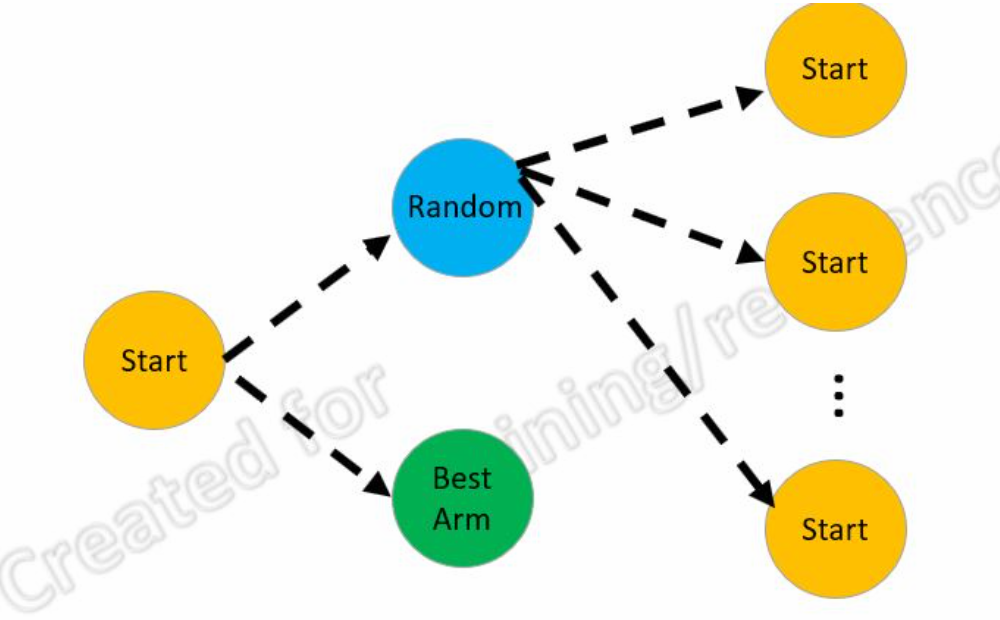

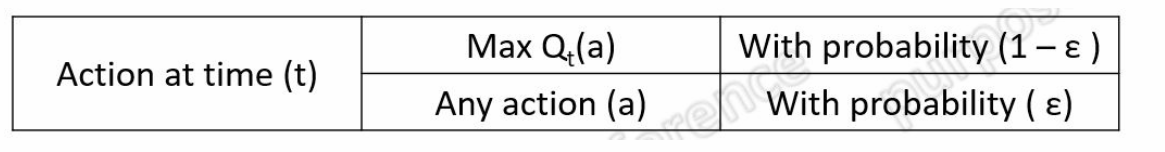

In [1]:
# Import required libraries 
import numpy as np 
import matplotlib.pyplot as plt

from lolviz import *

#### define a class and functions for the MAB

In [2]:
class Actions: 
    def __init__(self, arm_nbr):            # arm_nbr - number of actions/books/items
        self.arm_nbr          = arm_nbr 
        self.avg_reward       = 0
        self.arm_played_count = 0
    
    # Random reward 
    # why it is random? - because in MAB the reward distribution is NOT known
    def choose(self):  
        return np.random.rand() 
    
    # Update the action-value estimate (q value)
    def update(self, R): 
        self.arm_played_count += 1
        self.avg_reward        = (1 - 1.0 / self.arm_played_count)*self.avg_reward + 1.0 / self.arm_played_count * R    

initialize the arms (options)

In [3]:
arm_nbr1 = 1
arm_nbr2 = 2
arm_nbr3 = 3

# epsilon %
eps= 0.05

# number of runs
nbr_iters = 100000

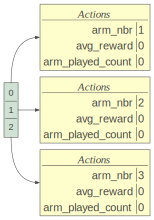

In [4]:
actions = [Actions(arm_nbr1), Actions(arm_nbr2), Actions(arm_nbr3)]

data    = np.empty(nbr_iters)

objviz(actions)

iteration .... 1

In [5]:
# generate a random number (0-1, prob)
np.random.random() 

0.12984651895062815

random number : 0.6070278417109428, arm selected : 0, GREEDY


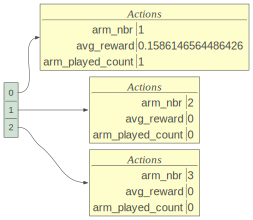

In [6]:
# generate a random number (0-1, prob)
rand_nbr = np.random.random() 

# action selection
if rand_nbr < eps:                                            # EXPLORE
    arm_selected = np.random.choice(3)                        # random action
    print('random number : {}, arm selected : {}, NON-GREEDY'.format(rand_nbr, arm_selected))
else: 
    arm_selected = np.argmax([a.avg_reward for a in actions]) # greedy arm
    print('random number : {}, arm selected : {}, GREEDY'.format(rand_nbr, arm_selected))

# get a random reward for the arm
reward = actions[arm_selected].choose()

# update the Q(A) value
actions[arm_selected].update(reward)

objviz(actions)

In [ ]:
i